<a href="https://colab.research.google.com/github/icecream126/CVML_ML_Study/blob/main/2021_07_31/Hyeseong/Probabiltiy_Expectation%26Distribution_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [39]:
np.random.seed(0)

# 1. Plot

$X$ ~ $N(0, 1^2)$ \\
$Y$ ~ $N(0, 2^2)$ \\

\\
* $E(X)$, $E(Y)$
* $E(XY)$
* $||X-Y||_{\alpha p}, where \ 1 \leq p \leq 10$

## 1.1. Implementation

* `Probability Density Function` (PDF): 확률 밀도 함수, 특정 구간에 속할 확률
* `Probability Density Function` in `Normal Distribution`: $$\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$


In [40]:
def normal_pdf(mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

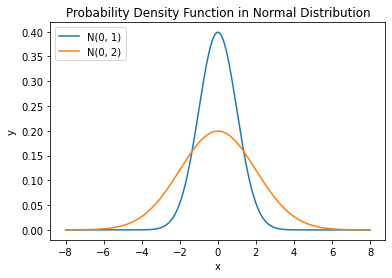

In [41]:
x = np.linspace(-8, 8, 1000)
y1 = normal_pdf(0.0, 1.0)
y2 = normal_pdf(0.0, 2.0)

plt.title('Probability Density Function in Normal Distribution')
plt.plot(x, y1, label='N(0, 1)')
plt.plot(x, y2, label='N(0, 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

### 1.1.1. $E(X), E(Y)$

* `Expectation` in `Normal Distribution`: $$\int_b^a PDF dx$$ $$\int_{-\infty}^\infty PDF dx$$

In [42]:
def expectation(x, pdf):
    return sum(np.multiply(x, pdf))

In [43]:
print("E(X): ", expectation(x, y1))
print("E(Y): ", expectation(x, y2))

E(X):  -9.83386745029233e-16
E(Y):  6.405249594609863e-15


### 1.1.2. $E(XY)$

In [44]:
print("E(XY): ", expectation(x, np.multiply(y1, y2)))

E(XY):  -2.863113221422735e-16


### 1.1.3. $||X-Y||_{p}, where \ 1 \leq p \leq 10$

$$||X||_{p}=(\int|X|^p\mathbb{P}(\omega))^{1/p}$$
$$||X-Y||_{p}=(\int|X-Y|^p\mathbb{P}(\omega))^{1/p}$$

In [45]:
def norm(x, y, p):
    return sum(abs(y)**p)**(1/p)

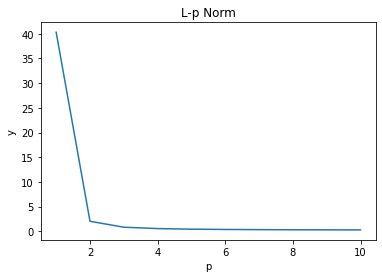

In [46]:
x_1 = [i+1 for i in range(10)]
plt.title('L-p Norm')
plt.xlabel('p')
plt.ylabel('y')
plt.plot(x_1, [norm(x, y1-y2, p) for p in x_1])

Convergence to 0 at $p\geq 2$.

## Using torch.randn

In [12]:
X = torch.randn((1000, ))
Y = torch.randn((1000, ))*(2**2)

In [13]:
print("E(X): ", torch.mean(X))
print("E(Y): ", torch.mean(Y))
print("E(XY): ", torch.mean(X*Y))

E(X):  tensor(0.0441)
E(Y):  tensor(-0.2233)
E(XY):  tensor(0.0723)


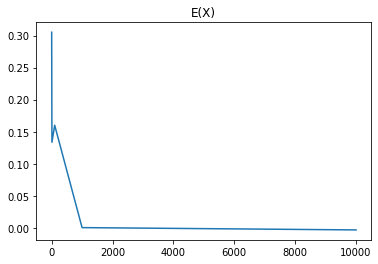

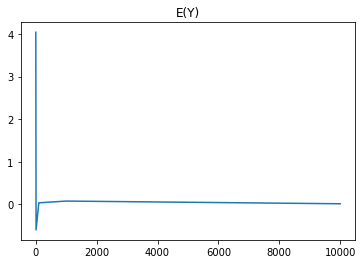

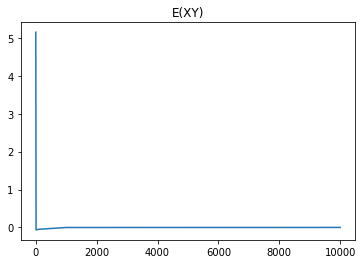

In [14]:
x = [10**i for i in range(5)]
y = [torch.mean(torch.randn((i, ))) for i in x]
plt.plot(x, y)
plt.title("E(X)")
plt.show()

y = [torch.mean(torch.randn((i, ))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(Y)")
plt.show()

y = [torch.mean(torch.randn((i, )))*torch.mean(torch.randn((i, ))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(XY)")
plt.show()

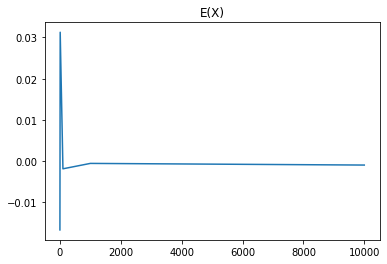

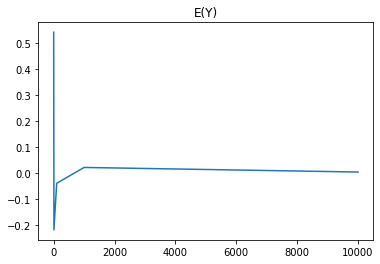

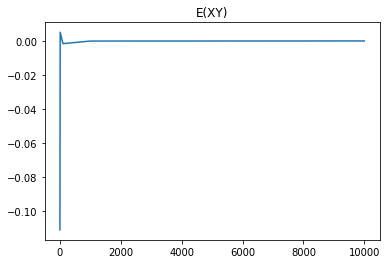

In [15]:
x = [10**i for i in range(5)]
y = [torch.mean(torch.randn((100, i))) for i in x]
plt.plot(x, y)
plt.title("E(X)")
plt.show()

y = [torch.mean(torch.randn((100, i))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(Y)")
plt.show()

y = [torch.mean(torch.randn((100, i)))*torch.mean(torch.randn((i, ))*(2**2)) for i in x]
plt.plot(x, y)
plt.title("E(XY)")
plt.show()

Convergence to 0.

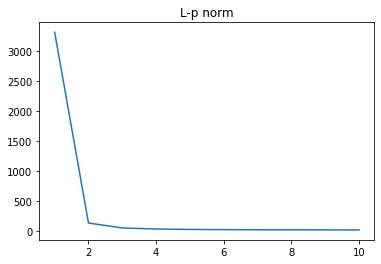

In [16]:
x = [i+1 for i in range(10)]
y = [torch.norm((X-Y), i) for i in x]
plt.plot(x, y)
plt.title("L-p norm")
plt.show()

Convergence to 0 at $p\geq 2$.

# 2. Learning NN

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [32]:
X = torch.randn((10000, 3))*2
Y = (torch.randn(10000, 3)*2+1)+(torch.randn(10000, 3)*3+2)
target = torch.randint(0, 5, (10000, 1), dtype=torch.float32).to(device)
X = X.to(device)
Y = Y.to(device)

In [33]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(3, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
model = Model().to(device)

In [35]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [36]:
num_epoch=300
losses = []

for epoch in range(num_epoch):
    model.train()

    optimizer.zero_grad()

    output_X = model(X).to(device)
    output_Y = model(Y).to(device)

    loss = F.mse_loss(torch.abs(output_X.mean()-output_Y.mean()), target)
    loss.backward()
    optimizer.step()

    print(f"[{epoch}/{num_epoch}] loss: {loss.item()}")

    losses.append(loss.item())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([10000, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':


[0/300] loss: 5.966793537139893
[1/300] loss: 5.826694965362549
[2/300] loss: 5.683732509613037
[3/300] loss: 5.53252649307251
[4/300] loss: 5.368143081665039
[5/300] loss: 5.185943126678467
[6/300] loss: 4.981794357299805
[7/300] loss: 4.751654148101807
[8/300] loss: 4.493222713470459
[9/300] loss: 4.206022262573242
[10/300] loss: 3.8939123153686523
[11/300] loss: 3.5655698776245117
[12/300] loss: 3.234941005706787
[13/300] loss: 2.920650005340576
[14/300] loss: 2.6422033309936523
[15/300] loss: 2.415546178817749
[16/300] loss: 2.2477054595947266
[17/300] loss: 2.135362386703491
[18/300] loss: 2.0672502517700195
[19/300] loss: 2.0295066833496094
[20/300] loss: 2.0101070404052734
[21/300] loss: 2.0007245540618896
[22/300] loss: 1.996389627456665
[23/300] loss: 1.9944517612457275
[24/300] loss: 1.9936050176620483
[25/300] loss: 1.9932409524917603
[26/300] loss: 1.9930858612060547
[27/300] loss: 1.9930204153060913
[28/300] loss: 1.992992877960205
[29/300] loss: 1.992981195449829
[30/300]

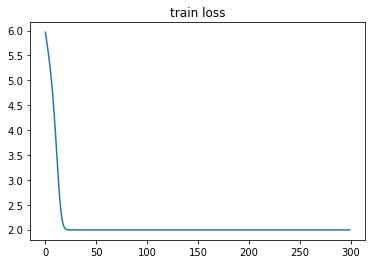

In [37]:
plt.plot(losses);
plt.title("train loss");